In [2]:

# 📦 Step 1: Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import *
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pickle

In [3]:
# 📂 Step 2: Load your dataset (Ensure the file is in the same folder or give full path)
df = pd.read_csv("Rainfall new.csv")

In [4]:
# 🧹 Step 3: Data Cleaning (Drop NA and print summary)
df = df.dropna()
print("Dataset Preview:\n", df.head())

Dataset Preview:
    pressure  temparature  dewpoint  humidity  cloud rainfall  windspeed
0    1025.9         18.3      13.1        72     49      yes       26.3
1    1022.0         18.9      15.6        81     83      yes       15.3
2    1019.7         19.3      18.4        95     91      yes       14.2
3    1018.9         20.6      18.8        90     88      yes       16.9
4    1015.9         20.7      19.9        95     81      yes       13.7


C:\Users\Divya\AppData\Local\Temp\ipykernel_31396\1183535569.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rainfall', data=df, palette='viridis')


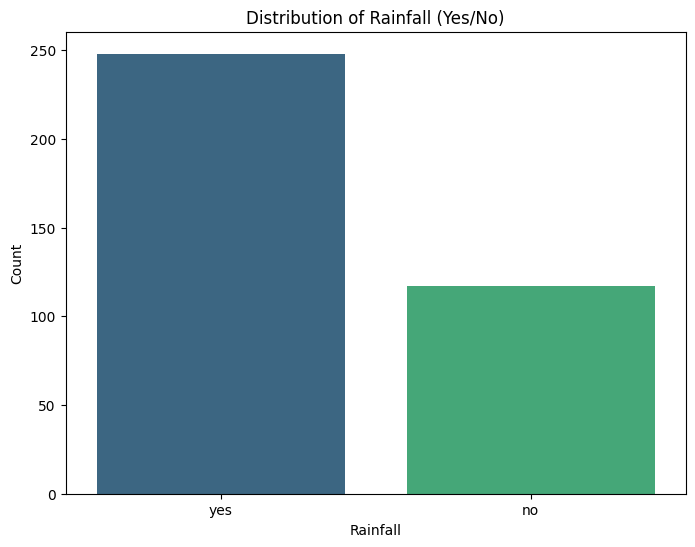

ValueError: could not convert string to float: 'yes'

<Figure size 1000x800 with 0 Axes>

In [5]:
# 📊 Step 4: Visualize the dataset
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='rainfall', data=df, palette='viridis')
plt.title("Distribution of Rainfall (Yes/No)")
plt.xlabel("Rainfall")
plt.ylabel("Count")
plt.show()

# Plot a heatmap to visualize correlations between features
plt.figure(figsize=(10, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
# Encode target variable 'yes' -> 1, 'no' -> 0
y = df['rainfall']
le = LabelEncoder()
y_encoded = le.fit_transform(y)  # y: "yes", "no" → 1, 0

In [ ]:
X = df.drop(columns=['rainfall'])  # Drop the target column to get the features
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
# Train classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# 📊 Step 7: Evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error on Test Set:", mse)

Mean Squared Error on Test Set: 0.2602739726027397


In [ ]:
# 💾 Step 8: Save the model
with open("rainfall_prediction_model_new.pkl", "wb") as f:
    pickle.dump(model, f)

In [ ]:
print("✅ Model trained and saved as rainfall_prediction_model.pkl")

✅ Model trained and saved as rainfall_prediction_model.pkl
